In [1]:
path_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"
path_results_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/Results/"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [26]:
from sklearn.decomposition import PCA

In [3]:
from Tool_Functions.cleaning_data import *
from Tool_Functions.join_data import *
from Tool_Functions.test_comportment_reabo import *
from Tool_Functions.visual import *
from Tool_Functions.comportment_reabo import *

In [11]:
new_df = file_to_dataframe(path_antoine + 'new_datas_diff_%.csv')

In [12]:
df = new_df.drop(columns = ['NB_APPARITIONS', 'MOY_DELAI'])

In [14]:
# Supposons que df est votre DataFrame et qu'il contient des valeurs 'inf'
# Remplacer 'inf' par NaN pour le traitement ultérieur
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
df

,ID_ABONNE,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,Semaine genéreuse_n_REABOS,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF
0,50402221602,0.0,0.000000,33.333333,0.000000,0.0,66.666667,0.0,0.000000,NaN,NaN,3.333333,NaN,NaN,-1.666667,NaN,NaN
1,50402223202,0.0,0.000000,27.586207,0.000000,0.0,13.793103,0.0,58.620690,NaN,NaN,0.288793,NaN,NaN,0.413793,NaN,-0.233207
2,50402224003,0.0,0.000000,42.857143,0.000000,0.0,0.000000,0.0,57.142857,NaN,NaN,0.475857,NaN,NaN,NaN,NaN,-0.357143
3,50402230202,0.0,0.000000,50.000000,0.000000,0.0,16.666667,0.0,33.333333,NaN,NaN,-0.333111,NaN,NaN,2.888889,NaN,-0.944111
4,50402230203,0.0,0.000000,52.631579,5.263158,0.0,15.789474,0.0,26.315789,NaN,NaN,0.110526,5.210526,NaN,9.210526,NaN,-6.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777139,53186931901,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,NaN,-0.666667,-0.666667,NaN,NaN,NaN,NaN,1.333333
777140,53186937201,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,NaN,-0.666667,-0.666667,NaN,NaN,NaN,NaN,1.333333
777141,53186971001,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,NaN,-0.666667,-0.666667,NaN,NaN,NaN,NaN,1.333333
777142,53186977101,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,NaN,0.333333,0.333333,NaN,NaN,NaN,NaN,-0.666667


In [20]:
# Séparer la colonne ID_ABONNE
df_id = df[['ID_ABONNE']].copy()

# Séparer les données à normaliser (sans la colonne ID_ABONNE)
df_to_scale = df.drop(columns=['ID_ABONNE'])


In [22]:

# Mise à l'échelle des données sans ID_ABONNE
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale.fillna(0)), columns=df_to_scale.columns)

# Concaténation de la colonne ID_ABONNE avec les données normalisées
df_scaled = pd.concat([df_id, df_scaled], axis=1)

In [23]:
# Remplacer les NaN standardisés par une valeur qui est significativement différente de la distribution des données
# Par exemple, en les mettant à -3 qui est environ 3 écarts types en dessous de la moyenne
df_scaled[np.isnan(df)] = -3

In [24]:
df_scaled

,ID_ABONNE,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,Semaine genéreuse_n_REABOS,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF
0,50402221602,-0.217105,-0.455025,-0.623109,-0.506478,-0.561681,8.422211,-0.231045,-1.627077,-3.0,-3.000000,0.367307,-3.00000,-3.0,-0.102994,-3.0,-3.000000
1,50402223202,-0.217105,-0.455025,-0.927357,-0.506478,-0.561681,1.368771,-0.231045,1.022017,-3.0,-3.000000,0.296734,-3.00000,-3.0,-0.042067,-3.0,0.413703
2,50402224003,-0.217105,-0.455025,-0.118926,-0.506478,-0.561681,-0.471256,-0.231045,0.955233,-3.0,-3.000000,0.301071,-3.00000,-3.0,-3.000000,-3.0,0.410070
3,50402230202,-0.217105,-0.455025,0.259211,-0.506478,-0.561681,1.752110,-0.231045,-0.120729,-3.0,-3.000000,0.282319,-3.00000,-3.0,0.030416,-3.0,0.392867
4,50402230203,-0.217105,-0.455025,0.398525,-0.126578,-0.561681,1.635091,-0.231045,-0.437855,-3.0,-3.000000,0.292602,-0.41083,-3.0,0.215546,-3.0,0.221546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777139,53186931901,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.044462,0.274587,-3.00000,-3.0,-3.000000,-3.0,0.459616
777140,53186937201,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.044462,0.274587,-3.00000,-3.0,-3.000000,-3.0,0.459616
777141,53186971001,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.044462,0.274587,-3.00000,-3.0,-3.000000,-3.0,0.459616
777142,53186977101,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.086532,0.297767,-3.00000,-3.0,-3.000000,-3.0,0.400999


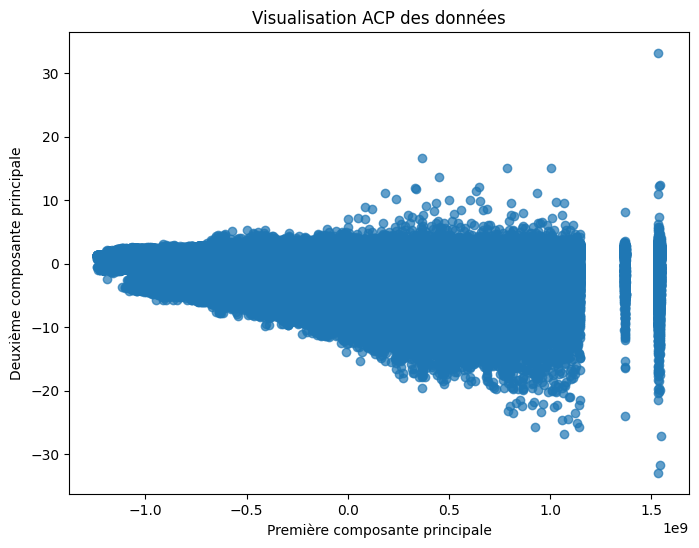

In [27]:
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
df_pca = pca.fit_transform(df_scaled)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation ACP des données')
plt.show()

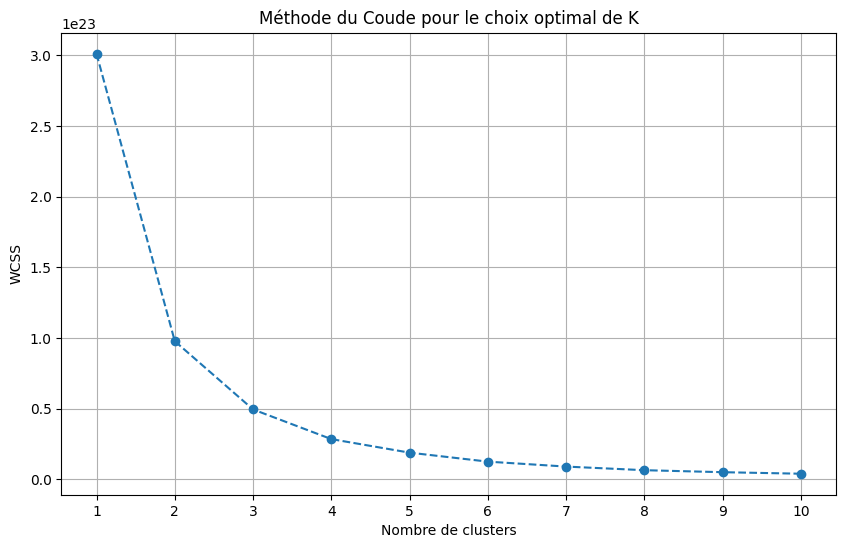

In [28]:
wcss = []
for i in range(1, 11):  # Test de 1 à 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Affichage de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude pour le choix optimal de K')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [30]:
np.random.seed(42)
indices = np.random.choice(range(len(df_scaled)), size=int(len(df_scaled) * 0.1), replace=False)
sample = df_scaled[indices]
silhouette_scores = []

for k in range(2, 11):  # Testez des valeurs de k de 2 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample)
    score = silhouette_scores(sample, kmeans.labels_)
    silhouette_scores.append(score)

KeyError: "None of [Index([ 89289, 520062, 542691, 212496, 616457, 285951, 541124, 262256, 474244,\n       656187,\n       ...\n       432634, 674922, 281834, 110928, 685413, 213338,  19017, 258421, 275414,\n       486563],\n      dtype='int64', length=77714)] are in the [columns]"

In [ ]:

# Initialiser le modèle KMeans avec un nombre déterminé de clusters
kmeans = KMeans(n_clusters=3)  # Remplacer 3 par le nombre approprié de clusters

# Ajuster le modèle aux données
kmeans.fit(df_scaled)

# Les étiquettes de cluster pour chaque point de données sont accessibles via kmeans.labels_
clusters = kmeans.labels_

# Ajouter les étiquettes de cluster au DataFrame original pour l'analyse


In [6]:
df

,ID_ABONNE,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,Semaine genéreuse_n_REABOS,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF
0,50402221602,0.0,0.000000,33.333333,0.000000,0.0,66.666667,0.0,0.000000,inf,inf,3.333333,inf,inf,-1.666667,inf,inf
1,50402223202,0.0,0.000000,27.586207,0.000000,0.0,13.793103,0.0,58.620690,inf,inf,0.288793,inf,inf,0.413793,inf,-0.233207
2,50402224003,0.0,0.000000,42.857143,0.000000,0.0,0.000000,0.0,57.142857,inf,inf,0.475857,inf,inf,inf,inf,-0.357143
3,50402230202,0.0,0.000000,50.000000,0.000000,0.0,16.666667,0.0,33.333333,inf,inf,-0.333111,inf,inf,2.888889,inf,-0.944111
4,50402230203,0.0,0.000000,52.631579,5.263158,0.0,15.789474,0.0,26.315789,inf,inf,0.110526,5.210526,inf,9.210526,inf,-6.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777139,53186931901,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,inf,-0.666667,-0.666667,inf,inf,inf,inf,1.333333
777140,53186937201,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,inf,-0.666667,-0.666667,inf,inf,inf,inf,1.333333
777141,53186971001,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,inf,-0.666667,-0.666667,inf,inf,inf,inf,1.333333
777142,53186977101,0.0,33.333333,33.333333,0.000000,0.0,0.000000,0.0,33.333333,inf,0.333333,0.333333,inf,inf,inf,inf,-0.666667


In [8]:
df_original = pd.DataFrame(df).set_index('ID_ABONNE')

In [9]:
columns_names = df_original.columns
columns_names

Index(['Autres_n_REABOS', 'ODD 15 jours EV+_n_REABOS',
       'ODD 15 jours TC_n_REABOS', 'ODD 21 jours TC_n_REABOS',
       'ODD 30 jours EV+_n_REABOS', 'ODD 30 jours TC_n_REABOS',
       'ODD 7 jours autre que SG_n_REABOS', 'Semaine genéreuse_n_REABOS',
       'Autres_MEAN_TIME_DIFF', 'ODD 15 jours EV+_MEAN_TIME_DIFF',
       'ODD 15 jours TC_MEAN_TIME_DIFF', 'ODD 21 jours TC_MEAN_TIME_DIFF',
       'ODD 30 jours EV+_MEAN_TIME_DIFF', 'ODD 30 jours TC_MEAN_TIME_DIFF',
       'ODD 7 jours autre que SG_MEAN_TIME_DIFF',
       'Semaine genéreuse_MEAN_TIME_DIFF'],
      dtype='object')

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Hyperparamètres : 
init : Méthode d'initialisation des centroïdes. Les options courantes sont 'k-means++' (défaut), 'random', un tableau donné de formes (n_clusters, n_features) ou une méthode d'initialisation personnalisée. 'k-means++' choisit les centroïdes initiaux pour le clustering k-means d'une manière qui accélère la convergence.

n_init : Nombre de fois où l'algorithme k-means sera exécuté avec différentes graines de centroïde. Les résultats finaux seront la meilleure sortie de n_init exécutions consécutives en termes d'inertie.

max_iter : Le nombre maximal d'itérations de l'algorithme k-means pour une seule exécution.
tol : Tolérance pour déclarer la convergence. Si les changements dans les centroïdes sont inférieurs à cette tolérance, l'algorithme peut arrêter plus tôt.

precompute_distances : Détermine si les distances entre les points doivent être précalculées ou calculées à la volée. Cela peut accélérer les choses mais peut aussi consommer beaucoup de mémoire pour les grands ensembles de données.
verbose : Mode verbeux.

random_state : Graine utilisée par le générateur de nombres aléatoires pour l'initialisation du centroïde ou si init est une graine pour l'algorithme k-means++.

copy_x : Si True (par défaut), les données d'entrée sont copiées, sinon elles peuvent être écrasées pendant le clustering.

algorithm : Choix de l'algorithme pour calculer les k-moyens parmi 'auto', 'full' ou 'elkan'. Le choix classique 'full' est l'algorithme EM pour le k-means. 'elkan' est une variante plus efficace qui est plus rapide sur les ensembles de données avec de nombreux clusters mais qui ne fonctionne pas avec des métriques autres que la distance euclidienne.

In [40]:
compte = df.groupby('Cluster').count()

In [41]:
compte

,Autres,ODD 15 jours EV+,ODD 15 jours TC,ODD 21 jours TC,ODD 30 jours EV+,ODD 30 jours TC,ODD 7 jours autre que SG,Semaine genéreuse
Cluster,,,,,,,,
0,308602,308602,308602,308602,308602,308602,308602,308602
1,576231,576231,576231,576231,576231,576231,576231,576231
2,71276,71276,71276,71276,71276,71276,71276,71276


In [42]:
centroids = kmeans.cluster_centers_

# Convertir les centroïdes en DataFrame pour une meilleure lisibilité
centroids_df = pd.DataFrame(centroids, columns=columns_names)

# Afficher les centroïdes
print(centroids_df)


     Autres  ODD 15 jours EV+  ODD 15 jours TC  ODD 21 jours TC  \
0  0.307610          0.061074         1.126297        -0.435975   
1 -0.154595          0.015486        -0.543121         0.252738   
2 -0.082091         -0.389635        -0.485873        -0.155534   

   ODD 30 jours EV+  ODD 30 jours TC  ODD 7 jours autre que SG  \
0          0.803886         0.437578                 -0.282348   
1         -0.404702        -0.206991                 -0.283452   
2         -0.208923        -0.221243                  3.514044   

   Semaine genéreuse  
0           1.048508  
1          -0.494218  
2          -0.544410  


In [43]:
save_to_csv_file(centroids_df, path_antoine + 'centres_clusters.csv')

True

In [44]:
df_scaled_df = pd.DataFrame(df_scaled, columns=columns_names)

In [45]:
df_scaled_df['Cluster'] = kmeans.labels_

In [46]:
k = 3
for i in range(k):
    print(f"Cluster {i} characteristics:")
    cluster_data = df_scaled_df[df_scaled_df['Cluster'] == i]
    # Vous pouvez ici calculer des statistiques ou des graphiques pour comprendre chaque cluster
    print(cluster_data.describe())  # Résumé statistique
    save_to_csv_file(cluster_data.describe(), path_antoine + 'cluster_data.csv')

Cluster 0 characteristics:
              Autres  ODD 15 jours EV+  ODD 15 jours TC  ODD 21 jours TC  \
count  308602.000000     308602.000000    308602.000000    308602.000000   
mean        0.308229          0.061040         1.126249        -0.436138   
std         1.441627          1.079247         0.667002         0.488874   
min        -0.249919         -0.517815        -1.274485        -0.599698   
25%        -0.249919         -0.517815         0.736338        -0.599698   
50%        -0.249919         -0.517815         1.023598        -0.599698   
75%        -0.249919         -0.517815         1.598119        -0.599698   
max        16.232513         11.867373        19.695521         5.027679   

       ODD 30 jours EV+  ODD 30 jours TC  ODD 7 jours autre que SG  \
count     308602.000000    308602.000000             308602.000000   
mean           0.803770         0.437633                 -0.282348   
std            1.163844         1.467611                  0.064621   
min     

In [11]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Clustering avec KMeans (utilisant un nombre prédéterminé de clusters, ici 3 pour l'exemple)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
clusters = kmeans.predict(features_scaled)

# Affichage des clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.7)
plt.title('Clusters des Abonnés (PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Clustering multidimensionnel : clustering spectral ou le Gaussian Mixture Model (GMM)

num_clusters = 3  # Nombre de clusters à rechercher
gmm = GaussianMixture(n_components=num_clusters, random_state=0)

# Entraînement du modèle
gmm.fit(scaled_data)

# Prédiction des clusters pour chaque individu
clusters = gmm.predict(scaled_data)

# Ajout des clusters au DataFrame
df['Cluster'] = clusters

# Affichage des résultats
print(df)

In [ ]:
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42, n_neighbors=10)

# Adapter le modèle aux données
clusters = spectral.fit_predict(data)

# Ajouter les clusters prédits à notre dataset fictif
data_with_clusters = np.column_stack((data, clusters))

# Créer un DataFrame pour une meilleure visualisation
data_with_clusters_df = pd.DataFrame(data_with_clusters, columns=[f'Feature{i}' for i in range(1, n_features+1)] + ['Cluster'])

# Affichage des premières lignes du DataFrame avec les clusters
print(data_with_clusters_df.head())

# Visualisation des clusters (si possible, en 2D en utilisant les deux premières caractéristiques)
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.7)
plt.title('Clustering Spectral')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.show()
